In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv("./data/genresTrain.csv")
data_train.head()

,PAR_TC,PAR_SC,PAR_SC_V,PAR_ASE1,PAR_ASE2,PAR_ASE3,PAR_ASE4,PAR_ASE5,PAR_ASE6,PAR_ASE7,...,PAR_3RMS_TCD,PAR_ZCD_10FR_MEAN,PAR_ZCD_10FR_VAR,PAR_1RMS_TCD_10FR_MEAN,PAR_1RMS_TCD_10FR_VAR,PAR_2RMS_TCD_10FR_MEAN,PAR_2RMS_TCD_10FR_VAR,PAR_3RMS_TCD_10FR_MEAN,PAR_3RMS_TCD_10FR_VAR,GENRE
0,2.5788,481.45,76989.0,-0.12334,-0.11578,-0.11176,-0.10412,-0.106100,-0.11026,-0.11375,...,0.002032,0.041056,0.000091,0.049627,0.000231,0.011265,0.000024,0.002177,0.000003,Pop
1,2.7195,1405.30,825380.0,-0.17655,-0.18323,-0.17773,-0.17057,-0.166440,-0.16174,-0.15371,...,0.005959,0.082830,0.001122,0.093622,0.003869,0.031467,0.000779,0.006716,0.000041,Blues
2,2.5351,601.09,686240.0,-0.13940,-0.13251,-0.11486,-0.10173,-0.099342,-0.10936,-0.12668,...,0.002766,0.043652,0.000358,0.045415,0.000211,0.013850,0.000038,0.003069,0.000002,Pop
3,2.4465,637.73,122580.0,-0.14995,-0.14802,-0.13800,-0.12927,-0.125150,-0.12340,-0.12159,...,0.002503,0.045159,0.000356,0.037388,0.000118,0.011897,0.000045,0.002645,0.000006,Jazz
4,2.5657,776.86,124010.0,-0.16863,-0.16112,-0.15935,-0.15120,-0.140340,-0.13002,-0.12804,...,0.002703,0.047347,0.000302,0.049469,0.000606,0.014052,0.000152,0.003244,0.000029,Jazz


#### Labels
- se cambia el target por valores numéricos

In [3]:
data_train.loc[data_train.loc[:,"GENRE"]=="Blues", "GENRE"] = 1
data_train.loc[data_train.loc[:,"GENRE"]=="Classical", "GENRE"] = 2
data_train.loc[data_train.loc[:,"GENRE"]=="Jazz", "GENRE"] = 3
data_train.loc[data_train.loc[:,"GENRE"]=="Metal", "GENRE"] = 4
data_train.loc[data_train.loc[:,"GENRE"]=="Pop", "GENRE"] = 5
data_train.loc[data_train.loc[:,"GENRE"]=="Rock", "GENRE"] = 6

#### Se separan los datos en X_train ^ y_train

In [4]:
y_train = data_train["GENRE"]
X_train = data_train.drop("GENRE", axis=1)
X_train.shape, y_train.shape

((12495, 191), (12495,))

In [5]:
X_train.head()

,PAR_TC,PAR_SC,PAR_SC_V,PAR_ASE1,PAR_ASE2,PAR_ASE3,PAR_ASE4,PAR_ASE5,PAR_ASE6,PAR_ASE7,...,PAR_2RMS_TCD,PAR_3RMS_TCD,PAR_ZCD_10FR_MEAN,PAR_ZCD_10FR_VAR,PAR_1RMS_TCD_10FR_MEAN,PAR_1RMS_TCD_10FR_VAR,PAR_2RMS_TCD_10FR_MEAN,PAR_2RMS_TCD_10FR_VAR,PAR_3RMS_TCD_10FR_MEAN,PAR_3RMS_TCD_10FR_VAR
0,2.5788,481.45,76989.0,-0.12334,-0.11578,-0.11176,-0.10412,-0.106100,-0.11026,-0.11375,...,0.011002,0.002032,0.041056,0.000091,0.049627,0.000231,0.011265,0.000024,0.002177,0.000003
1,2.7195,1405.30,825380.0,-0.17655,-0.18323,-0.17773,-0.17057,-0.166440,-0.16174,-0.15371,...,0.028308,0.005959,0.082830,0.001122,0.093622,0.003869,0.031467,0.000779,0.006716,0.000041
2,2.5351,601.09,686240.0,-0.13940,-0.13251,-0.11486,-0.10173,-0.099342,-0.10936,-0.12668,...,0.012735,0.002766,0.043652,0.000358,0.045415,0.000211,0.013850,0.000038,0.003069,0.000002
3,2.4465,637.73,122580.0,-0.14995,-0.14802,-0.13800,-0.12927,-0.125150,-0.12340,-0.12159,...,0.011283,0.002503,0.045159,0.000356,0.037388,0.000118,0.011897,0.000045,0.002645,0.000006
4,2.5657,776.86,124010.0,-0.16863,-0.16112,-0.15935,-0.15120,-0.140340,-0.13002,-0.12804,...,0.012517,0.002703,0.047347,0.000302,0.049469,0.000606,0.014052,0.000152,0.003244,0.000029


In [6]:
X_train = minmax_scale(X_train,feature_range=(-1,1))
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_train, y_train, test_size=0.3)

In [7]:
clf = RandomForestClassifier(n_estimators=15, n_jobs=3)
clf.fit(X_train_p, y_train_p)
clf.score(X_train_p, y_train_p)

0.9993139721015322

In [8]:
clf.score(X_test_p, y_test_p)

0.9125100026673779

#### Datos de test

In [9]:
data_test = pd.read_csv("./data/genresTest.csv")
data_test.head()

,PAR_TC,PAR_SC,PAR_SC_V,PAR_ASE1,PAR_ASE2,PAR_ASE3,PAR_ASE4,PAR_ASE5,PAR_ASE6,PAR_ASE7,...,PAR_2RMS_TCD,PAR_3RMS_TCD,PAR_ZCD_10FR_MEAN,PAR_ZCD_10FR_VAR,PAR_1RMS_TCD_10FR_MEAN,PAR_1RMS_TCD_10FR_VAR,PAR_2RMS_TCD_10FR_MEAN,PAR_2RMS_TCD_10FR_VAR,PAR_3RMS_TCD_10FR_MEAN,PAR_3RMS_TCD_10FR_VAR
0,2.5851,887.72,203130.0,-0.17260,-0.16509,-0.15114,-0.14272,-0.13747,-0.13437,-0.12990,...,0.014458,0.003283,0.060789,0.000173,0.049469,0.000209,0.014727,0.000058,0.003690,0.000007
1,2.4621,370.86,4835.0,-0.16553,-0.16676,-0.16022,-0.15304,-0.14354,-0.13443,-0.12450,...,0.007165,0.001832,0.019472,0.000006,0.021197,0.000100,0.008136,0.000055,0.002112,0.000006
2,2.5894,536.33,59175.0,-0.14433,-0.15838,-0.15151,-0.13966,-0.12591,-0.11795,-0.11744,...,0.009742,0.002032,0.037165,0.000158,0.037856,0.000123,0.009627,0.000068,0.001916,0.000004
3,2.4876,1053.70,147250.0,-0.12813,-0.11979,-0.12223,-0.11881,-0.12020,-0.12702,-0.13608,...,0.020571,0.002458,0.074786,0.000113,0.088109,0.000152,0.021083,0.000071,0.002590,0.000006
4,2.7968,354.90,7610.9,-0.16335,-0.16976,-0.17196,-0.16772,-0.16637,-0.15903,-0.13995,...,0.004825,0.001905,0.017377,0.000015,0.010852,0.000153,0.004702,0.000044,0.002101,0.000008


In [10]:
X_test = minmax_scale(data_test,feature_range=(-1,1))

In [11]:
clf = RandomForestClassifier(n_estimators=15, n_jobs=3)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9990396158463385

In [12]:
predict = clf.predict(X_test)

In [13]:
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_5.csv')

### Correlación de los datos

In [14]:
m_cor = data_train.corr()

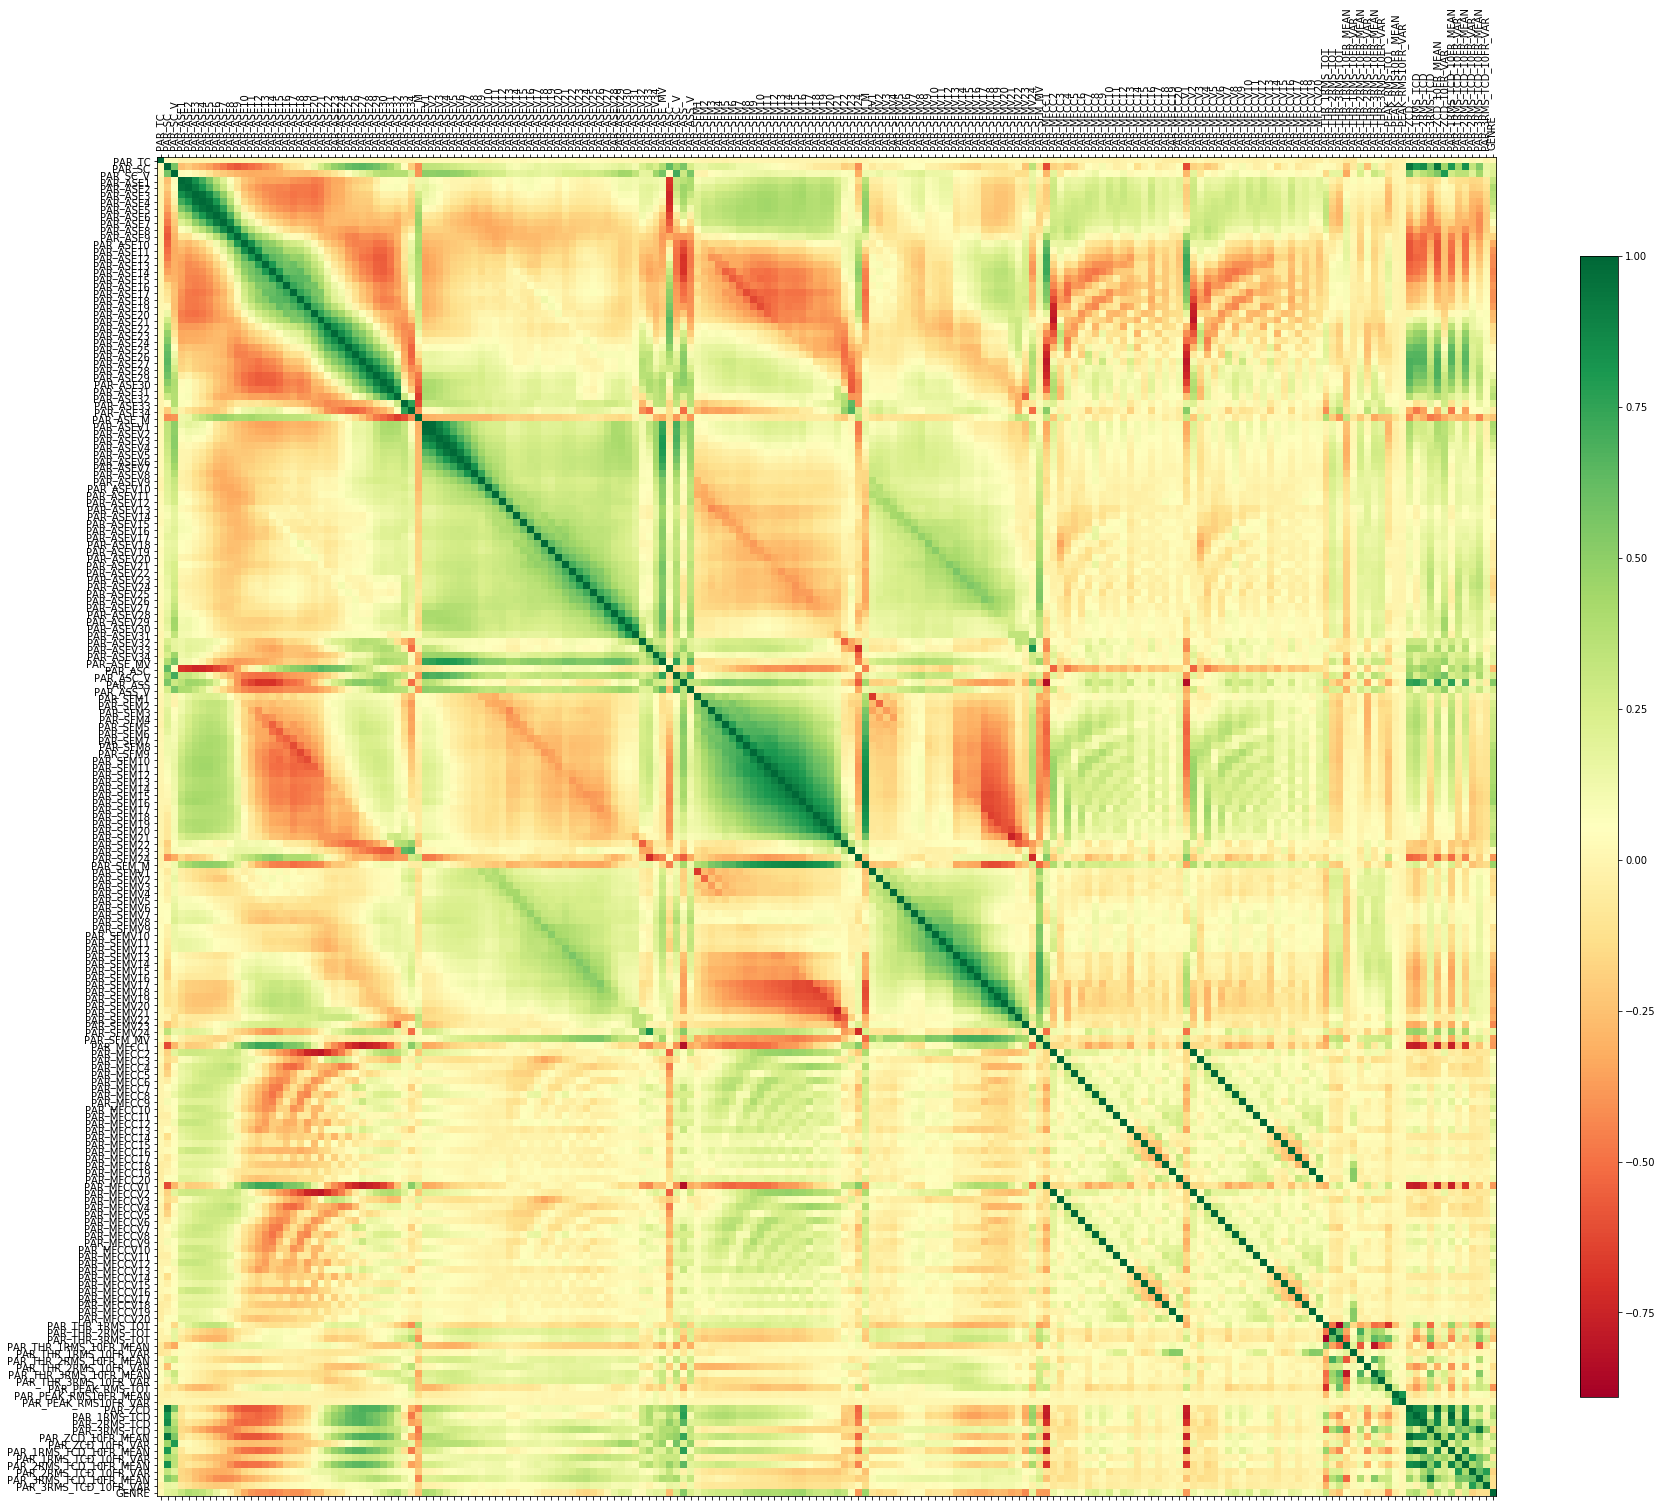

In [15]:
fig, ax = plt.subplots(figsize=(30,30))
cax = ax.matshow(m_cor, cmap='RdYlGn')
plt.xticks(range(len(m_cor.columns)), m_cor.columns, rotation=90)
plt.yticks(range(len(m_cor.columns)), m_cor.columns)

fig.colorbar(cax, shrink=.7, aspect=30);

In [16]:
m_cor.loc[:,((m_cor >= .99).sum() > 1)==True].columns

Index(['PAR_MFCC1', 'PAR_MFCC2', 'PAR_MFCC3', 'PAR_MFCC4', 'PAR_MFCC5',
       'PAR_MFCC6', 'PAR_MFCC7', 'PAR_MFCC8', 'PAR_MFCC9', 'PAR_MFCC10',
       'PAR_MFCC11', 'PAR_MFCC12', 'PAR_MFCC13', 'PAR_MFCC14', 'PAR_MFCC15',
       'PAR_MFCC16', 'PAR_MFCC17', 'PAR_MFCC18', 'PAR_MFCC19', 'PAR_MFCC20',
       'PAR_MFCCV1', 'PAR_MFCCV2', 'PAR_MFCCV3', 'PAR_MFCCV4', 'PAR_MFCCV5',
       'PAR_MFCCV6', 'PAR_MFCCV7', 'PAR_MFCCV8', 'PAR_MFCCV9', 'PAR_MFCCV10',
       'PAR_MFCCV11', 'PAR_MFCCV12', 'PAR_MFCCV13', 'PAR_MFCCV14',
       'PAR_MFCCV15', 'PAR_MFCCV16', 'PAR_MFCCV17', 'PAR_MFCCV18',
       'PAR_MFCCV19', 'PAR_MFCCV20', 'PAR_ZCD', 'PAR_1RMS_TCD',
       'PAR_ZCD_10FR_MEAN', 'PAR_1RMS_TCD_10FR_MEAN'],
      dtype='object')

In [17]:
m_cor[m_cor["PAR_SC"]>0.7].index

Index(['PAR_SC', 'PAR_ZCD', 'PAR_1RMS_TCD', 'PAR_2RMS_TCD',
       'PAR_ZCD_10FR_MEAN', 'PAR_1RMS_TCD_10FR_MEAN',
       'PAR_2RMS_TCD_10FR_MEAN'],
      dtype='object')

### Datos mas relacionados
- Se guarda en un diccionario los datos mas correlacionados para así tomar solo uno de cada conjunto de datos.

In [18]:
dict_l = {}
for i in m_cor.index:
    dict_l.update({i:m_cor[m_cor[i]>0.9].index})

In [19]:
dict_l

{'PAR_TC': Index(['PAR_TC'], dtype='object'),
 'PAR_SC': Index(['PAR_SC', 'PAR_ZCD', 'PAR_ZCD_10FR_MEAN'], dtype='object'),
 'PAR_SC_V': Index(['PAR_SC_V'], dtype='object'),
 'PAR_ASE1': Index(['PAR_ASE1', 'PAR_ASE2'], dtype='object'),
 'PAR_ASE2': Index(['PAR_ASE1', 'PAR_ASE2', 'PAR_ASE3'], dtype='object'),
 'PAR_ASE3': Index(['PAR_ASE2', 'PAR_ASE3', 'PAR_ASE4'], dtype='object'),
 'PAR_ASE4': Index(['PAR_ASE3', 'PAR_ASE4', 'PAR_ASE5'], dtype='object'),
 'PAR_ASE5': Index(['PAR_ASE4', 'PAR_ASE5', 'PAR_ASE6'], dtype='object'),
 'PAR_ASE6': Index(['PAR_ASE5', 'PAR_ASE6', 'PAR_ASE7'], dtype='object'),
 'PAR_ASE7': Index(['PAR_ASE6', 'PAR_ASE7'], dtype='object'),
 'PAR_ASE8': Index(['PAR_ASE8'], dtype='object'),
 'PAR_ASE9': Index(['PAR_ASE9'], dtype='object'),
 'PAR_ASE10': Index(['PAR_ASE10'], dtype='object'),
 'PAR_ASE11': Index(['PAR_ASE11'], dtype='object'),
 'PAR_ASE12': Index(['PAR_ASE12'], dtype='object'),
 'PAR_ASE13': Index(['PAR_ASE13'], dtype='object'),
 'PAR_ASE14': Index(['PA

#### Nuevo para eliminar columnas muy correlacionadas.

In [38]:
cols_drop = []
for idx in dict_l:
    if not (idx in cols_drop): #si ya está para eliminar no se revisa
        for j in range(len(dict_l[idx])):
            if idx != dict_l[idx][j]: #el se quiere mantener
                if not (dict_l[idx][j] in cols_drop): #si no se a eliminado se puede eliminar
                    cols_drop.append(dict_l[idx][j])
                    #print(idx, dict_l[idx][j])

len(cols_drop)

36

In [39]:
cols_drop

['PAR_ZCD',
 'PAR_ZCD_10FR_MEAN',
 'PAR_ASE2',
 'PAR_ASE4',
 'PAR_ASE6',
 'PAR_ASE30',
 'PAR_ASEV2',
 'PAR_ASEV4',
 'PAR_ASEV6',
 'PAR_SFM12',
 'PAR_SFM14',
 'PAR_SFM16',
 'PAR_SFM19',
 'PAR_MFCCV1',
 'PAR_MFCCV2',
 'PAR_MFCCV3',
 'PAR_MFCCV4',
 'PAR_MFCCV5',
 'PAR_MFCCV6',
 'PAR_MFCCV7',
 'PAR_MFCCV8',
 'PAR_MFCCV9',
 'PAR_MFCCV10',
 'PAR_MFCCV11',
 'PAR_MFCCV12',
 'PAR_MFCCV13',
 'PAR_MFCCV14',
 'PAR_MFCCV15',
 'PAR_MFCCV16',
 'PAR_MFCCV17',
 'PAR_MFCCV18',
 'PAR_MFCCV19',
 'PAR_MFCCV20',
 'PAR_1RMS_TCD_10FR_MEAN',
 'PAR_2RMS_TCD_10FR_MEAN',
 'PAR_3RMS_TCD_10FR_MEAN']

In [24]:
cols_drop = []
for idx in dict_l:
    for j in range(len(dict_l[idx])):
        if idx != dict_l[idx][j]: #si tiene mas de un valor, el mismo no cuenta
            cols_drop.append(dict_l[idx][j])
            #print(idx, dict_l[idx][j])

In [26]:
len(cols_drop)

92

#### Eliminación de columnas
- Se eliminan las columnas que se cree que tienen mucha correlación y lo que hacen es causar overffiting

In [21]:
df_train_drop = data_train
df_test_drop = data_test
for idx in np.unique(cols_drop):
    df_train_drop = df_train_drop.drop(idx,axis=1)
    df_test_drop = df_test_drop.drop(idx,axis=1)

In [16]:
df_train_drop.shape, df_test_drop.shape

((12495, 118), (5225, 117))

In [23]:
y_trdrop = df_train_drop["GENRE"]
X_trdrop = df_train_drop.drop("GENRE",axis=1)

clf = RandomForestClassifier(n_estimators=15, n_jobs=3)
clf.fit(X_trdrop, y_trdrop)
print(clf.score(X_trdrop, y_trdrop))

predict = clf.predict(df_test_drop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_6.csv')

0.9988795518207283


In [24]:
from sklearn.ensemble import GradientBoostingClassifier

y_trdrop = df_train_drop["GENRE"]
X_trdrop = df_train_drop.drop("GENRE",axis=1)

clf = GradientBoostingClassifier(learning_rate=0.1)
clf.fit(X_trdrop, y_trdrop)
print(clf.score(X_trdrop, y_trdrop))

predict = clf.predict(df_test_drop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_9.csv')

0.9675070028011205


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

y_trdrop = df_train_drop["GENRE"]
X_trdrop = df_train_drop.drop("GENRE",axis=1)

clf = GradientBoostingClassifier(learning_rate=0.2)
clf.fit(X_trdrop, y_trdrop)
print(clf.score(X_trdrop, y_trdrop))

predict = clf.predict(df_test_drop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_13.csv')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

y_trdrop = df_train_drop["GENRE"]
X_trdrop = df_train_drop.drop("GENRE",axis=1)

clf = GradientBoostingClassifier(learning_rate=0.25 ,n_estimators=150)
clf.fit(X_trdrop, y_trdrop)
print(clf.score(X_trdrop, y_trdrop))

predict = clf.predict(df_test_drop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_14.csv')

### PRUEBAS POR HACER
- mudar el parametro de learning_rate y n_estimators del GBC, probar eliminando mas parámetros correlacionados, esta prueba se hizo con una correlación mayor a 9, probar con otro parámetro de correlación.
- Probar con otros estimadores y normalizar los datos, al parecer el MinMaxScaler no funciona bien, probar nuevamente.

#### Datos con una correlación mas baja
- Se hará una prueba eligiendo los datos que tenga a lo mas una correlación igual o inferior a 0.8

In [10]:
umbral_cor = 0.8
dict_l = {}
for i in m_cor.index:
    dict_l.update({i:m_cor[m_cor[i]>umbral_cor].index})
#columnas a eliminar
cols_drop = []
for idx in dict_l:
    for j in range(len(dict_l[idx])):
        if idx != dict_l[idx][j]: #si tiene mas de un valor, el mismo no cuenta
            cols_drop.append(dict_l[idx][j])
            #print(idx, dict_l[idx][j])

#Se eliminan las columnas
df_train_drop = data_train
df_test_drop = data_test
for idx in np.unique(cols_drop):
    df_train_drop = df_train_drop.drop(idx,axis=1)
    df_test_drop = df_test_drop.drop(idx,axis=1)
#Se entrena el modelo y se genera el archivo de subbmision
y_trdrop = df_train_drop["GENRE"]
X_trdrop = df_train_drop.drop("GENRE",axis=1)

clf = GradientBoostingClassifier(learning_rate=0.1)
clf.fit(X_trdrop, y_trdrop)
print(clf.score(X_trdrop, y_trdrop))

predict = clf.predict(df_test_drop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_10.csv')

0.9546218487394958


In [22]:
def data_scale(df):
    """
    df: DataFrame de entrada
    return: retorna un df con las columnas estandarizadas así:
    (X - mean(X))/(max(X)-min(X))
    """
    for col in df.columns:
        #se cambia cada columna
        df[col] = (df[col] - np.mean(df[col]))/(max(df[col]) - min(df[col]))
    return df

In [23]:
X_trdrop = data_scale(X_trdrop)
df_test_drop = data_scale(df_test_drop)

X_trdrop.shape, df_test_drop.shape

((12495, 117), (5225, 117))

In [24]:
X_trdrop.head().T

,0,1,2,3,4
PAR_TC,0.025113,0.064559,0.012861,-0.011978,0.021440
PAR_SC_V,-0.015974,0.048429,0.036455,-0.012051,-0.011928
PAR_ASE8,0.016321,-0.116360,-0.015834,0.046612,-0.030414
PAR_ASE9,-0.059978,-0.131306,0.013285,-0.008003,-0.054795
PAR_ASE10,-0.080659,-0.175909,0.002659,0.007723,-0.019888
PAR_ASE11,-0.077599,-0.114465,-0.079436,0.049203,0.024276
PAR_ASE12,-0.070681,-0.089805,-0.040899,-0.061045,0.113554
PAR_ASE13,-0.069261,-0.196083,0.027788,-0.014562,0.127033
PAR_ASE14,-0.076694,0.159503,-0.054736,0.048142,0.172764
PAR_ASE15,0.014410,0.158153,-0.137887,0.095169,0.151072


In [ ]:
clf = GradientBoostingClassifier(learning_rate=0.1)
clf.fit(X_trdrop, y_trdrop)
print(clf.score(X_trdrop, y_trdrop))

predict = clf.predict(df_test_drop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_11.csv')

### Pruebas mudando el learning rate en el GBC

In [ ]:
np.arange(1,3,0.1)

1 - 3   0.1

In [38]:
def k_crossvalidation(X, y, lr_i, lr_f, step):
    """
    Función para validar el mejor "learning_rate"
    X: datos de entrenamiento
    y: labels de entrenamiento
    
    return: score
    """
    n_cols = 2
    n_iter = np.arange(lr_i, lr_f + 1, step)
    result = np.zeros((len(n_iter), n_cols))
    idx = 0
    for i in n_iter:
        clf = GradientBoostingClassifier(learning_rate=i)
        cvs = cross_val_score(clf, X, y, cv=5)
        result[idx,0] =  i #valor del learning rate
        result[idx,1] = np.mean(cvs)
        idx+=1
            
    return result

In [39]:
y_trdrop = df_train_drop["GENRE"]
X_trdrop = df_train_drop.drop("GENRE",axis=1)
score = k_crossvalidation(X_trdrop, y_trdrop, 0.1, 3.0, step=0.1)

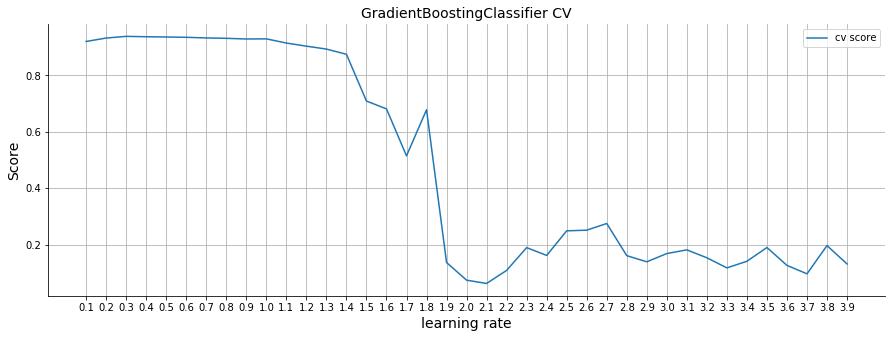

In [44]:
ax = plt.figure(figsize=(15,5))
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("GradientBoostingClassifier CV", size=14)
plt.xlabel("learning rate", size=14)
plt.ylabel("Score", size=14)
plt.xticks(score[:,0])
plt.plot(score[:,0],score[:,1], label="cv score")
plt.grid()
plt.legend();

### Al parecer el mejor Learning-rate es 0.3

In [45]:
y_trdrop = df_train_drop["GENRE"]
X_trdrop = df_train_drop.drop("GENRE",axis=1)

clf = GradientBoostingClassifier(learning_rate=0.2)
clf.fit(X_trdrop, y_trdrop)
print(clf.score(X_trdrop, y_trdrop))

predict = clf.predict(df_test_drop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_15.csv')

0.9991996798719488


In [24]:
y_trdrop = df_train_drop["GENRE"]
X_trdrop = df_train_drop.drop("GENRE",axis=1)

clf = GradientBoostingClassifier(learning_rate=0.2)
clf.fit(X_trdrop, y_trdrop)
print(clf.score(X_trdrop, y_trdrop))

predict = clf.predict(df_test_drop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_16.csv')

0.9933573429371749


In [25]:
sum(df_train_drop["PAR_SC_V"] >100)

12495

In [17]:
for i in df_train_drop.columns:
    if sum(df_train_drop[i] > 100) > (df_train_drop.shape[0]/2):
        df_train_drop = df_train_drop.drop(i, axis=1)
        df_test_drop = df_test_drop.drop(i, axis=1)

In [18]:
df_train_drop.shape, df_test_drop.shape

((12495, 117), (5225, 116))

In [28]:
y_trdrop = df_train_drop["GENRE"]
X_trdrop = df_train_drop.drop("GENRE",axis=1)

clf = GradientBoostingClassifier(learning_rate=0.2)
clf.fit(X_trdrop, y_trdrop)
print(clf.score(X_trdrop, y_trdrop))

predict = clf.predict(df_test_drop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_17.csv')

0.9923969587835134


#### El mejor hasta ahora
- Sin escalar los datos

In [31]:
X_trdrop.shape
X_trdrop.head()

,PAR_TC,PAR_ASE8,PAR_ASE9,PAR_ASE10,PAR_ASE11,PAR_ASE12,PAR_ASE13,PAR_ASE14,PAR_ASE15,PAR_ASE16,...,PAR_THR_2RMS_10FR_VAR,PAR_THR_3RMS_10FR_MEAN,PAR_THR_3RMS_10FR_VAR,PAR_PEAK_RMS_TOT,PAR_PEAK_RMS10FR_MEAN,PAR_PEAK_RMS10FR_VAR,PAR_ZCD_10FR_VAR,PAR_1RMS_TCD_10FR_VAR,PAR_2RMS_TCD_10FR_VAR,PAR_3RMS_TCD_10FR_VAR
0,2.5788,-0.12465,-0.13659,-0.13951,-0.14003,-0.13893,-0.14148,-0.14381,-0.13480,-0.14171,...,0.000036,0.002384,4.177900e-06,3.9295,4.0001,0.32300,0.000091,0.000231,0.000024,0.000003
1,2.7195,-0.14458,-0.14691,-0.15324,-0.14565,-0.14155,-0.15822,-0.11068,-0.11531,-0.11116,...,0.000068,0.002770,5.629600e-06,5.1372,5.7044,3.18450,0.001122,0.003869,0.000779,0.000041
2,2.5351,-0.12948,-0.12599,-0.12750,-0.14031,-0.13485,-0.12867,-0.14073,-0.15545,-0.15016,...,0.000065,0.002868,5.601000e-06,3.8047,3.7870,0.31701,0.000358,0.000211,0.000038,0.000002
3,2.4465,-0.12010,-0.12907,-0.12677,-0.12070,-0.13761,-0.13426,-0.12630,-0.12385,-0.14257,...,0.000089,0.004931,2.591300e-05,5.2128,5.4222,1.74920,0.000356,0.000118,0.000045,0.000006
4,2.5657,-0.13167,-0.13584,-0.13075,-0.12450,-0.11369,-0.11557,-0.10882,-0.11627,-0.13813,...,0.000032,0.000669,9.754300e-07,5.9162,6.4966,4.32160,0.000302,0.000606,0.000152,0.000029


In [30]:
y_trdrop = df_train_drop["GENRE"]
X_trdrop = df_train_drop.drop("GENRE",axis=1)

clf = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)
clf.fit(X_trdrop, y_trdrop)
print(clf.score(X_trdrop, y_trdrop))

predict = clf.predict(df_test_drop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_20.csv')

0.9965586234493797


In [19]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

y_trdrop = df_train_drop["GENRE"]
X_trdrop = df_train_drop.drop("GENRE",axis=1)

clf = QuadraticDiscriminantAnalysis()
clf.fit(X_trdrop, y_trdrop)
print(clf.score(X_trdrop, y_trdrop))

predict = clf.predict(df_test_drop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_22.csv')

0.9102040816326531


/home/ejrueda/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


### Columna X_trdrop["PAR_PEAK_RMS10FR_VAR"] con outliers

In [20]:
df_train_drop = df_train_drop.drop("PAR_PEAK_RMS10FR_VAR", axis=1)
df_test_drop = df_test_drop.drop("PAR_PEAK_RMS10FR_VAR", axis=1)

y_trdrop = df_train_drop["GENRE"]
X_trdrop = df_train_drop.drop("GENRE",axis=1)

clf = GradientBoostingClassifier(n_estimators=120, learning_rate=0.2)
clf.fit(X_trdrop, y_trdrop)
print(clf.score(X_trdrop, y_trdrop))

predict = clf.predict(df_test_drop)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_23.csv')

0.9966386554621849


In [52]:
data_train.shape, data_test.shape

((12495, 192), (5225, 191))

In [55]:
for i in data_train.columns:
    if sum(data_train[i] > 20) > (data_train.shape[0]/2):
        data_train = data_train.drop(i, axis=1)
        data_test = data_test.drop(i, axis=1)

In [56]:
data_train.shape, data_test.shape

((12495, 190), (5225, 189))

In [57]:
y = data_train["GENRE"]
X = data_train.drop("GENRE",axis=1)

clf = GradientBoostingClassifier(learning_rate=0.2)
clf.fit(X, y)
print(clf.score(X, y))

predict = clf.predict(data_test)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_18.csv')

0.9966386554621849


In [60]:
y = data_train["GENRE"]
X = data_train.drop("GENRE",axis=1)

X = data_scale(X)
data_test =data_scale(data_test)
clf = GradientBoostingClassifier(learning_rate=0.2)
clf.fit(X, y)
print(clf.score(X, y))

predict = clf.predict(data_test)
result = pd.DataFrame(data=predict, index=np.arange(1, data_test.shape[0]+1), columns=['Genres'])
result.index.name = "Id"
result.to_csv('./results/submission_test_19.csv')

0.9969587835134054


### Pruebas por hacer #2
- Probar un CV con diferente medida de correlación, con el mejor learning-rate elegido.
- Probar escalando las caracteristicas que toque
- Probar balanceando el dataset
- ver caractareristica por caracteristica y escalar las que se deban
- hacer un PCA

In [ ]:
"PAR_PEAK_RMS10FR_VAR"